In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Real world data

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('mobile_cleaned.csv')
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


Generally we will have to do some pre-processing on the data also. Here, pre-processing steps like - cleaning, categorical value to numerical(one hot encoding), etc are already done.  

Task - predict rating from other variables.

In [5]:
XX = data.drop('Rating',axis=1)
Y = data['Rating'].values #values convert to np array.

In [6]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

### classification task using real-output.  (train on real, use thresholding to predict, evaluate on binary)

In this data rating is a real value. We want to do binary classification => binarise Y.  

Now there is a real Y and a binarised Y. Task for the model is to do binary classification.  
But we train the model with real Y, as sigmoid can capture real Y.  
Then we use thresholding, etc. to give a class prediction.  

While evaluating accuracy - we won't do something like sq error with real Y; instead we find the fraction of time the correct class was predicted.

In [7]:
# binarising Y using thresholding

thresh = 4

#add binarised Y to the dataframe itself as a new column ("class")
data['class'] = ( data['Rating'] >= thresh ).astype(int)

In [10]:
data['class'].value_counts(normalize = True)
# normalize - gives in percentage
# otherwise total count

1    0.697947
0    0.302053
Name: class, dtype: float64

Percentage of one class is more => data is skewed.   
if the model keeps predicting that class all the time - it gets a high accuracy(=percentage of that class)  
we don't want the model to learn something like that  

"baseline" - accuracy we get if the model keep predicting one class all the time.  
if a model accuracy is better than this baseline - then can say it has learned something  

one way - to correct the class imbalance here - change threshold


In [11]:
thresh = 4.2
data['class'] = ( data['Rating'] >= thresh ).astype(int)
data['class'].value_counts(normalize = True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [12]:
Y_binarised = data['class'].values #binarised Y - nd array

### Stadardisation of data

data can be of different range -though it can still work with model learning weights corresponding to the value scales, its but better to standardise data : make mean=0, SD=1 

(x-mu)/sig

In [13]:
from sklearn.preprocessing import StandardScaler

#### Standardisation demo

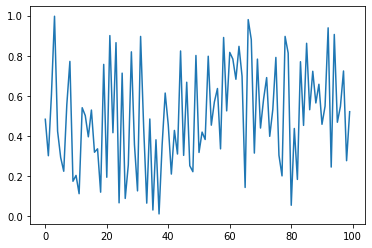

0.5004092229238256 0.2569603008761964


In [17]:
#stardasition demo
R = np.random.random([100,1]) #100 points
plt.plot(R)
plt.show()

print(np.mean(R),np.std(R))

StandardScaler is a class. So we make an object first and use functions with that object.

In [19]:
ss = StandardScaler()
ss.fit(R) #compute mean and std to be used for later scaling

# the class has mean, SD attibutes. That get updated to mean, SD of the passed data.
# template is similar to what was seen before

StandardScaler()

In [20]:
ss.mean_ #same mean as above

array([0.50040922])

Transform the data(standardise) : (x-mean)/SD  
using transform function  
it used the object attributes - mean and SD - which were updated with the fit() function

In [21]:
RT = ss.transform(R) #transform R using the updated mean,SD
#now RT is of almost 0 mean, 1 std dev

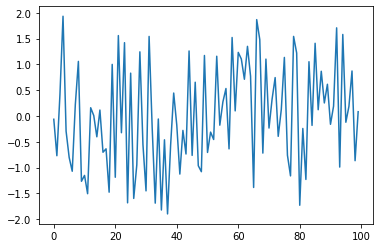

In [22]:
plt.plot(RT)
plt.show()

plot looks exactly the first one.. but changed the y axis, so that mean and std dev are so.   
only scaled and shifted - linear mapping - thus same shape.

#### Standardising our data

should we split(train-test) first and then standardise or standardise whole data first and then split?  



the **idea of train, test** is : its like we only have access to the train data while training, and we want to see the performance of model on **unseen test data**.

we can do whatever we want on the train data - preprocess, standardise,etc.. - then we learn model, find parameters..  

only then we have access to the test data. - where we try to evaluate its accuracy.  

can't standardise with mean, std dev of whole data - "as we don't have access to it" => only train data.  

first split.  
think : "we only have access to train data"    
standardise train data - with **its** mean,SD.  

then for evaluation - standardise test data - but there also use the **same mean, SD of train data**.  

"test data is supposed to be unknown data. so we don't know the mean , std dev of that."  
its like test data is coming to use one by one
 
this is the reason why the standard scalar has two seperate functions- one to find mean, std dev - and other to transform. - instead of a single function that takes the data and returns the standardised data.  
the mean,SD updated by calling fit on train data - will be used on test data as well during evaluation.


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
XX_train, XX_test, Y_train, Y_test = train_test_split(XX,Y,random_state=0,stratify=Y_binarised)

stratify based on the binarised ouput(categorical)

standardisation called on data => does on each column  

fit_transform() is another fucntion - does fit() first, and transform(). like calling together. mean, SD updated with that fit() call within it.

In [26]:
ss = StandardScaler()

XX_train_standardised = ss.fit_transform(XX_train) #standardise all columns of XX_train

#now the parameter - mean , std - are that of train data

#use that to transform test data.

XX_test_standardised = ss.transform(XX_test) #we are standardising test data with train data's -mean, SD

### Scaling of Y to 0-1 range
#### Linear mapping of data

The point of standardising the inputs was to account for different scales of values. Its better if they are standard.   

Now we need to transform Y also - because here we are using a sigmoid model  
sigmoid - gives an ouput value in 0-1  
so we want the 'true' y values also to be like that.  

using MinMaxScaler  
map min to 0 and max to 1 (linearly)  

fit() - updates min and max attributes  
transform() - scale input with those  

test data is unknown - we don't know its min, max.  
=> min, max of train is used to map test also.

In [28]:
# sklearn min max scalar

from sklearn.preprocessing import MinMaxScaler

In [29]:
mm_scalar = MinMaxScaler()

Y_train_scaled = mm_scalar.fit_transform(Y_train.reshape(-1,1)) #'fit_transform' for train
#reshape because need as column.

Y_test_scaled = mm_scalar.transform(Y_test.reshape(-1,1)) # 'transform' for test
# min , max of train to map(transform) test also.

#### numpy reshaping
reshape(m,n) , where mxn is the new shape  
-1 (negative shape) => that dim is infered, so that size is matched  
(one arg can be -1)  
reshape(-1,1) => new shape = (any,1)  
=> return single column.

#### binarisation on transformed Y

In [34]:
#classification problem - need binary col for accuracy.

#binarising the transformed Y.

#first must transform the threshold

thresh_scaled = mm_scalar.transform( np.array([thresh]).reshape(-1,1) )[0][0]
thresh_scaled

0.6800000000000002

In [35]:
# binarise with the transformed threshold
Y_binaraised_train = (Y_train_scaled > thresh_scaled).astype(int).ravel()
Y_binaraised_test = (Y_test_scaled > thresh_scaled).astype(int).ravel()

#### np.ravel()   
return the flattened 1D array with all elements